In [73]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [2]:
#Load the Train Dataset
train = pd.read_csv("../data/X_train_ini.csv")
test = pd.read_csv("../data/test.csv")
test_fold_1 = pd.read_csv("../data/fold/fold_1.csv")

In [3]:
#Load the Train Dataset
train = pd.read_csv("../data/X_train_ini.csv")
test = pd.read_csv("../data/test.csv")
test_fold_1 = pd.read_csv("../data/fold/fold_1.csv")

X_test=test_fold_1.copy()

#Feature Engineering
#One Hot Encoding Train
train['IsHoliday_oh'] = train['IsHoliday'].astype(int)
#One Hot Encoding Test
X_test['IsHoliday_oh'] = X_test['IsHoliday'].astype(int)
#Extract Year, Month, Week, Date (Train)
train['day'] = pd.to_datetime(train['Date']).dt.day
train['week'] = pd.to_datetime(train['Date']).dt.week
train['month'] = pd.to_datetime(train['Date']).dt.month
train['year'] = pd.to_datetime(train['Date']).dt.year

#Extract Year, Month, Week, Date (Test)
X_test['day'] = pd.to_datetime(X_test['Date']).dt.day
X_test['week'] = pd.to_datetime(X_test['Date']).dt.week
X_test['month'] = pd.to_datetime(X_test['Date']).dt.month
X_test['year'] = pd.to_datetime(X_test['Date']).dt.year


y_train = train['Weekly_Sales']
X_train = train.drop(['IsHoliday','Date','Weekly_Sales'],axis=1)

X_test = X_test.drop(['IsHoliday','Date','Weekly_Sales'],axis=1)

In [61]:
X_train

,Store,Dept,IsHoliday_oh,day,week,month,year
0,1,1,0,5,5,2,2010
1,1,1,1,12,6,2,2010
2,1,1,0,19,7,2,2010
3,1,1,0,26,8,2,2010
4,1,1,0,5,9,3,2010
...,...,...,...,...,...,...,...
164110,45,98,0,28,4,1,2011
164111,45,98,0,4,5,2,2011
164112,45,98,1,11,6,2,2011
164113,45,98,0,18,7,2,2011


In [ ]:
#Assign the Weights based on the IsHoliday
weights = [5 if i==1 else 1 for i in test_fold_1['IsHoliday'].astype(int)]
#Actuals Weekly Sales
y_actuals = test_fold_1['Weekly_Sales']

In [75]:
#ElasticNet
el_mod = ElasticNet(random_state = 125247)
el_mod.fit(X_train,y_train)

#ElasticNet (Prediction)
y_preds = el_mod.predict(X_test)
y_preds[np.isnan(y_preds)] = 0

#Calculate the WAE
wae = sum(weights * abs(y_actuals - y_preds)) / sum(weights)
print ("Elastic - WAE:{}".format(wae))

Elastic - WAE:14413.761438591679


In [ ]:
#xgboost
xgb_mod = xgb.XGBRegressor(objective ='reg:squarederror',
                           colsample_bytree = 0.1,
                           learning_rate = 0.04,
                           max_depth = 25,
                           alpha = 1, 
                           n_estimators = 1000,
                           verbosity=1
                          )
xgb_mod.fit(X_train,y_train)

#Xgboost (Prediction)
y_preds = xgb_mod.predict(X_test)
y_preds[np.isnan(y_preds)] = 0

#Calculate the WAE
wae = sum(weights * abs(y_actuals - y_preds)) / sum(weights)
print ("Xgboost - WAE:{}".format(wae))

In [25]:
#Linear Regression
lin_mod = LinearRegression()
lin_mod.fit(X_train,y_train)

#Linear Regression (Prediction)
y_preds = lin_mod.predict(X_test)
y_preds[np.isnan(y_preds)] = 0

#Calculate the WAE
wae = sum(weights * abs(y_actuals - y_preds)) / sum(weights)
print ("Linear Regression - WAE:{}".format(wae))

Linear Regression - WAE:14207.524492659804


In [58]:
#Random Forest
#'''
rf_mod = RandomForestRegressor(max_depth=60,
                               n_estimators=2000,
                               random_state=125247)
'''
rf_mod = RandomForestRegressor(n_estimators=150,
                               random_state=125247)
'''
rf_mod.fit(X_train,y_train)

#Random Forest (Prediction)
y_preds = rf_mod.predict(X_test)
y_preds[np.isnan(y_preds)] = 0

#Calculate the WAE
wae = sum(weights * abs(y_actuals - y_preds)) / sum(weights)
print ("Random Forrest - WAE:{}".format(wae))

Random Forrest - WAE:1727.2223987770749


In [59]:
#Random Forest
rf_mod = RandomForestRegressor(n_estimators=150,
                               random_state=125247)
rf_mod.fit(X_train,y_train)

#Random Forest (Prediction)
y_preds = rf_mod.predict(X_test)
y_preds[np.isnan(y_preds)] = 0

#Calculate the WAE
wae = sum(weights * abs(y_actuals - y_preds)) / sum(weights)
print ("Random Forrest - WAE:{}".format(wae))

Random Forrest - WAE:1731.7923736134726


In [56]:
#Random Forest
#'''
rf_mod = RandomForestRegressor(max_depth=40,
                               n_estimators=1000,
                               random_state=125247)
'''
rf_mod = RandomForestRegressor(n_estimators=150,
                               random_state=125247)
'''
rf_mod.fit(X_train,y_train)

#Random Forest (Prediction)
y_preds = rf_mod.predict(X_test)
y_preds[np.isnan(y_preds)] = 0

#Calculate the WAE
wae = sum(weights * abs(y_actuals - y_preds)) / sum(weights)
print ("Random Forrest - WAE:{}".format(wae))

Random Forrest - WAE:1727.1289489649562


In [37]:
#xgboost
xgb_mod = xgb.XGBRegressor(objective ='reg:squarederror',
                           colsample_bytree = 0.1,
                           learning_rate = 0.04,
                           max_depth = 25,
                           alpha = 1, 
                           n_estimators = 1000,
                           verbosity=1
                          )
xgb_mod.fit(X_train,y_train)

#Xgboost (Prediction)
y_preds = xgb_mod.predict(X_test)
y_preds[np.isnan(y_preds)] = 0

#Calculate the WAE
wae = sum(weights * abs(y_actuals - y_preds)) / sum(weights)
print ("Xgboost - WAE:{}".format(wae))

Xgboost - WAE:7625.359656636214


In [42]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/austa.csv')

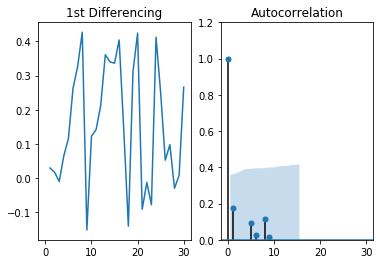

In [43]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.show()

In [44]:
from statsmodels.tsa.arima_model import ARIMA

In [46]:
model = ARIMA(df.value, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   30
Model:                 ARIMA(1, 1, 2)   Log Likelihood                  11.512
Method:                       css-mle   S.D. of innovations              0.160
Date:                Sat, 10 Apr 2021   AIC                            -13.023
Time:                        14:36:52   BIC                             -6.017
Sample:                             1   HQIC                           -10.782
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1677      0.013     12.997      0.000       0.142       0.193
ar.L1.D.value     0.7104      0.177      4.013      0.000       0.363       1.057
ma.L1.D.value    -0.6119      0.217     

In [47]:
# 1,1,1 ARIMA Model
model = ARIMA(df.value, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   30
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  10.322
Method:                       css-mle   S.D. of innovations              0.171
Date:                Sat, 10 Apr 2021   AIC                            -12.645
Time:                        14:37:56   BIC                             -7.040
Sample:                             1   HQIC                           -10.852
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1540      0.037      4.158      0.000       0.081       0.227
ar.L1.D.value    -0.2906      0.481     -0.604      0.546      -1.233       0.652
ma.L1.D.value     0.5350      0.414     

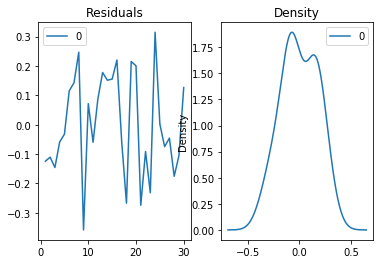

In [48]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

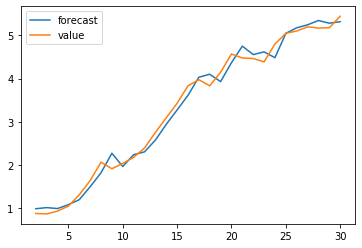

In [49]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [50]:
model_fit

In [51]:
from sklearn.ensemble import RandomForestRegressor
clf_rf = RandomForestRegressor(n_estimators=150)
clf_rf.fit(X_train, y_train)
acc_rf= round(clf_rf.score(X_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_rf)

Accuracy: 99 % 



In [52]:
y_preds=clf_rf.predict(X_test)

In [53]:
#Calculate the WAE
wae = sum(weights * abs(y_actuals - y_preds)) / sum(weights)
print ("Xgboost - WAE:{}".format(wae))

Xgboost - WAE:1729.5745618861115
